# Project Title: Ham and Spam E-Mails Classification Using Machine Learning Techniques

***Project Description:***

In this project, you will build a system that automatically classifies emails as either "Ham" (legitimate) or "Spam" (unwanted) using machine learning techniques. The goal is to create a model that can differentiate between useful emails and spam emails, helping users manage their inboxes effectively.
Expected Outcome:
By the end of the project, students will have a machine learning model that can classify emails into ham or spam with a high degree of accuracy. This project will provide practical experience with data preprocessing, feature engineering, model training, and evaluation, making it an excellent introduction to the world of machine learning and text classification.


**Expected Outcome:**

By the end of the project, students will have a machine learning model that can classify emails into ham or spam with a high degree of accuracy. This project will provide practical experience with data preprocessing, feature engineering, model training, and evaluation, making it an excellent introduction to the world of machine learning and text classification.


# Importing Libraries & Dataset

In [1]:
import pandas as pd

# Load the uploaded dataset to inspect its structure and contents
file_path = 'spam.csv'

# Read the dataset
data = pd.read_csv(file_path, encoding='latin1')  # Using 'latin1' to handle potential encoding issues
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


Downladed the dataset from kaggle and loaded in data and head displayed

The dataset appears to have the following columns:

- **v1**: Contains the label (`ham` or `spam`).
- **v2**: Contains the email text.
- **Unnamed: 2**, **Unnamed: 3**, **Unnamed: 4**: Seem to be empty or irrelevant coluns.


# Exploratory Data Analysis & Data Cleaning

## Next Steps:

### Clean the data:
- Retain only the necessary columns (`v1` for the label and `v2` for the email tex
- Rename these columns for clarity.
- Remove duplicates in label column.
ty.

### Prepare the dataset for modeling:
- Convert text labels (`ham`, `spam`) into numeric format.
- Split the data into training and testing sets.

### Build the model:
- Use techniques like **TF-IDF** for text feature extraction.
- Train a machine learning classifier (e.g., **Naive Bayes**, **Logistic Regression**).

Let me proceed with clea

## Step 1: Clean the Data

- Retain only the necessary columns (`label` and `text`).
- Remove any irrelevant or empty columns.
- Rename columns for clarity (if necessary).
- Ensure the dataset contains valid entries for both labels and text.

In [2]:
# Drop unnecessary columns
data_cleaned = data[['v1', 'v2']].copy()

# Rename the columns for clarity
data_cleaned.columns = ['label', 'text']

# Display the cleaned dataset
data_cleaned.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
data_cleaned.describe()

,label,text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


Analysis:
Text Data Variety in v2:

5,169 unique messages out of 5,572 total indicates high variety in SMS content.
Repeated messages like "Sorry, I'll call later" could be from promotional or template-based communication.
Irrelevant Columns (Unnamed: 2, etc.):

These columns have very few non-null values and seem unrelated to the main data. They are likely artifacts from the dataset formatting and should be dropped or explored further to confirm their relevance.

In [4]:
# Remove any duplicate rows
data_cleaned.drop_duplicates(inplace=True)

print(data_cleaned.shape)
data_cleaned.describe()

(5169, 2)


,label,text
count,5169,5169
unique,2,5169
top,ham,"Go until jurong point, crazy.. Available only ..."
freq,4516,1


The dataset has been cleaned and now contains two columns:

- **label**: Indicates whether the email is "ham" (legitimate) or "spam".
- **text**: Contains the email text.


## Step 2: Convert Text Labels to Numeric Format

You can use pandas' `map` function to convert the text labels (`'ham'`, `'spam'`) into numeric values (e.g., `0` for `'ham'` and `1` for `'spam`):


In [5]:
from sklearn.model_selection import train_test_split

# Convert labels to binary format: 'ham' -> 0, 'spam' -> 1
data_cleaned['label'] = data_cleaned['label'].map({'ham': 0, 'spam': 1})

# Verify the changes
data_cleaned.head()

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


## Step 3: Split the Data into Training and Testing Sets

For model training, we typically split the data into training and testing sets. You can use `train_test_split` from `sklearn.model_selection` for this:

Splitting the dataframe to two parts train and test whith training set of 80% and test set of 20%.

In [6]:
# Split the dataset into training and testing sets
X = data_cleaned['text']
y = data_cleaned['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Check the split sizes
len(X_train), len(X_test), len(y_train), len(y_test)

(4135, 1034, 4135, 1034)

## Step 4 - i: Text Preprocessing

We will perform the following tasks to clean and preprocess the text data:

1. **Convert all text to lowercase** to ensure uniformity and avoid treating the same word in different cases as different words.
2. **Remove special characters and digits** to focus on relevant words.
3. **Tokenize the text**: While TF-IDF can handle basic tokenization, additional tokenization steps can help in more complex scenarios.


In [7]:
import re

# Preprocess the text: lowercase and remove special characters
def preprocess_text(text):
    # Lowercase the text
    text = text.lower()
    # Remove special characters and digits
    text = re.sub(r'[^a-z\s]', '', text)
    return text

# Apply the preprocessing function to the training and testing data
X_train = X_train.apply(preprocess_text)
X_test = X_test.apply(preprocess_text)

# Display some preprocessed text samples
X_train

3794           also remember the beads dont come off ever
4290                                call me when ure done
2603    im at arestaurant eating squid i will be out a...
3452    nowadays people are notixiquating the laxinorf...
3132                              so no messages had food
                              ...                        
5307                               what you did in  leave
3455                            ok ill do you right later
1708    hows my loverboy doing  what does he do that k...
2730                            i havent lei next mon can
2871                                       see you there 
Name: text, Length: 4135, dtype: object

## Step 4 - ii: Text Vectorization using TF-IDF

Now that the text is preprocessed, we will extract features using **TF-IDF** (Term Frequency-Inverse Document Frequency). TF-IDF converts the text data into a matrix of numerical features that can be used for machine learning models.

Here’s how to do it using `TfidfVectorizer` from `sklearn.feature_extraction.text`:


In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=5000)  # Limit the number of features to 5000 for efficiency

# Fit and transform the training data
X_train_tfidf = vectorizer.fit_transform(X_train)

# Transform the test data (using the same vocabulary as the training data)
X_test_tfidf = vectorizer.transform(X_test)

# Check the shape of the transformed feature matrices
print(f"Training data shape: {X_train_tfidf.shape}")
print(f"Testing data shape: {X_test_tfidf.shape}")

Training data shape: (4135, 5000)
Testing data shape: (1034, 5000)


The dataset has been split into training and testing sets:

- **Training Set**: 4,135 samples.  
- **Testing Set**: 1,034 samples.

## Step5: Handling Class Imbalance:

In [9]:
# Check the distribution of ham and spam in v1 to plan for handling imbalance during model training:

y_train.value_counts()


label
0    3631
1     504
Name: count, dtype: int64

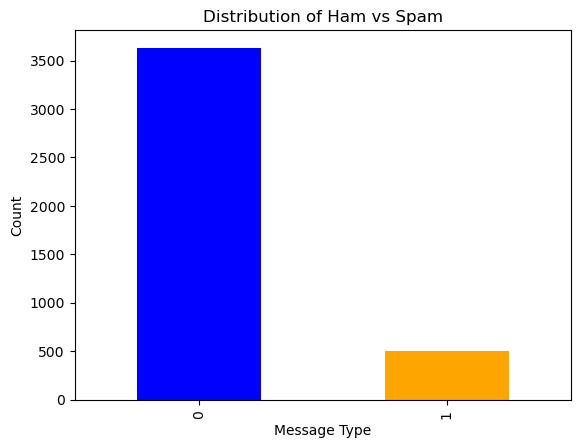

In [10]:
# Create a bar plot to visualize the distribution of labels
import matplotlib.pyplot as plt

y_train.value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title('Distribution of Ham vs Spam')
plt.xlabel('Message Type')
plt.ylabel('Count')
plt.show()


The dataset is highly imbalanced, with 87.8% `ham` (`0`) messages (3,631/4135) and 12.2% `spam` (`1`) messages (504/4135) in training set. This imbalance can lead to machine learning models being biased toward the majority class (ham), affecting fairness and accuracy. Proper handling of class imbalance is crucial when building models.

## Handling Class Imbalance

Class imbalance is an important step to improve the performance of the model, especially when the dataset contains significantly more examples from one class than the other. For your problem (spam vs. ham classification), it's possible that the dataset has an imbalance between "ham" (non-spam) and "spam" messages.

### Approaches to Handle Class Imbalance:

1. **Use class weights in the classifier**: Many machine learning algorithms, including Logistic Regression, allow you to set class weights, which automatically penalize the model more for misclassifying the minority class.

2. **Resample the dataset**: We can either oversample the minority class (spam) or undersample the majority class (ham) to balance the ority class.
ion_report(y_test, y_pred))


# Applying machine learning classification model

### Approach 1: **Using class weights in the Logistic Regression model.** 

This method does not alter the data itself but adjusts the model's learning process to focus more on the minority class.

In this approach, the model adjusts the penalty for misclassifying the minority class (e.g., "spam") by assigning higher weights to it and lower weights to the majority class (e.g., "ham") during training. This balances the importance of both classes without altering the dataset.

#### Pros:
- **No Data Duplication or Alteration**: Avoids creating synthetic or duplicate samples, preserving the integrity of the dataset.
- **Efficient and Straightforward**: Requires no additional preprocessing steps and is computationally efficient.
- **Prevents Overfitting**: Does not artificially inflate the dataset, reducing the risk of overfitting.

#### Cons:
- **Model-Specific**: Not all classifiers support the use of class weights.

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Initialize the Logistic Regression model with class weights
model = LogisticRegression(max_iter=1000, class_weight='balanced')

# Train the model on the training data
model.fit(X_train_tfidf, y_train)

# Predict on the test data
y_pred = model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Display a classification report
print(classification_report(y_test, y_pred))

Accuracy: 97.78%
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       885
           1       0.93      0.91      0.92       149

    accuracy                           0.98      1034
   macro avg       0.96      0.95      0.95      1034
weighted avg       0.98      0.98      0.98      1034



In [14]:
from sklearn.naive_bayes import MultinomialNB

# Step 5: Train a Naive Bayes model
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

# Predict on the test data
y_pred = model.predict(X_test_tfidf)

# Step 7: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 93.91%
Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.97       885
           1       1.00      0.58      0.73       149

    accuracy                           0.94      1034
   macro avg       0.97      0.79      0.85      1034
weighted avg       0.94      0.94      0.93      1034



### Approach 2: Using SMOTE (Synthetic Minority Oversampling Technique)

SMOTE generates synthetic samples of the minority class (e.g., "spam") by interpolating between existing minority class samples, balancing the training data.#

### Pros:
- **Improves Learning for Severe Imbalance**: Directly balances the training data, helping the model better understand the minority class.
- **Model-Agnostic**: Works with any classifier since it modifies the data, notodhe mo#del.

### Cons:
- **Computational Overhead**: Generating synthetic samples requires additional computation, increasing training time.
- **Risk of Overfitting**: Oversampling, especially on small datasets, can lead to overfitting as the model trains on synthetic data that may not generalize well.
- **Changes Data Distribution**: Synthetic data might not represent real-world distributions, potentially introducing bias.



In [12]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training data to balance the classes
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_tfidf, y_train)

# Train the model on the resampled training data
model = LogisticRegression()
model.fit(X_train_resampled, y_train_resampled)

# Predict on the test data
y_pred_resampled = model.predict(X_test_tfidf)

# Evaluate the model
accuracy_resampled = accuracy_score(y_test, y_pred_resampled)
print(f"Accuracy after resampling: {accuracy_resampled * 100:.2f}%")

# Display a classification report for resampled data
print(classification_report(y_test, y_pred_resampled))


Accuracy after resampling: 97.68%
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       885
           1       0.94      0.90      0.92       149

    accuracy                           0.98      1034
   macro avg       0.96      0.94      0.95      1034
weighted avg       0.98      0.98      0.98      1034



In [13]:
from sklearn.naive_bayes import MultinomialNB

# Step 5: Train a Naive Bayes model
model = MultinomialNB()
model.fit(X_train_resampled, y_train_resampled)

# Step 6: Predict on the test data
y_pred = model.predict(X_test_tfidf)

# Step 7: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 96.81%
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98       885
           1       0.87      0.91      0.89       149

    accuracy                           0.97      1034
   macro avg       0.93      0.95      0.94      1034
weighted avg       0.97      0.97      0.97      1034



## Pros and Cons of Each Approach (Naive Bayes model)

| **Approach**       | **Pros**                                                     | **Cons**                                                      |
|---------------------|-------------------------------------------------------------|--------------------------------------------------------------|
| **Before SMOTE**    | - High precision for minority class (spam).                 | - Poor recall for minority class (misses many spam).         |
|                     | - No additional computational overhead.                     | - Strong bias toward the majority class (ham).               |
| **After SMOTE**     | - Significant improvement in recall for spam (91%).         | - Slight decrease in precision for the minority class.       |
|                     | - Overall better balance between classes.                   | - More computational cost due to SMOTE processing.           |
